# CREDIT CARD APPROVAL PROJECT

***by Abhijeet Sethy***

***Student ID: S3805***

***Batch: DS27A***

********************
### Machine learning algorithms are being used to predict credit card acceptance based on consumer information.
********************

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky.
So, here we will try to make Machine Learning models to predict customer worthiness of getting a creditcard.

## Available Features

**Features name:** (Credit_Card.csv)

**Ind_ID:** Client ID

**Gender:** Gender information

**Car_owner:** Having car or not

**Propert_owner:** Having property or not

**Children:** Count of children

**Annual_income:** Annual income

**Type_Income:** Income type

**Education:** Education level

**Marital_status:** Marital_status

**Housing_type:** Living style

**Birthday_count:** Use backward count from current day (0), -1 means yesterday.

**Employed_days:** Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

**Mobile_phone:** Any mobile phone

**Work_phone:** Any work phone

**Phone:** Any phone number

**EMAIL_ID:** Any email ID

**Type_Occupation:** Occupation

**Family_Members:** Family size

### **The whole Data Analysis and Machine Learning Process consist of 6 steps:**

**1.**Data Understanding

**2.**Data Cleaning

**3.**Exploratory Data Analysis

**4.**Feature Selection and Feature Engineering

**5.**Modeling

**6.**Train-Test Split

**7.**Model Training

**8.**Evaluation

**9.**Deployment

## 1.Data Understanding

A bank's credit card department heavily relies on data science for customer acquisition. They prioritize assessing creditworthiness to avoid risky lending. They use a data-driven system called Credit Scoring, specifically an application scorecard, to determine the cutoff value for credit card applications, which helps assess risk levels based on current strategic priorities.

To apply for a credit card, customers submit application data, either physically or online. This data is used alongside external Credit Bureau Scores (e.g., FICO Score in the US or CIBIL Score in India) and internal information to make informed credit decisions. The bank is also increasingly incorporating external data to improve its credit assessments.

***The dataset contains customer information that will be utilized to predict their creditworthiness in the future.***

### Available Features

******************************************************
***First Dataset Name*** (Credit_Card.csv) 
******************************************************
#### **************** Features****************
**Ind_ID:** Client ID

**Gender:** Gender information

**Car_owner:** Having car or not

**Propert_owner:** Having property or not

**Children:** Count of children

**Annual_income:** Annual income

**Type_Income:** Income type

**Education:** Education level

**Marital_status:** Marital_status

**Housing_type:** Living style

**Birthday_count:** Use backward count from current day (0), -1 means yesterday.

**Employed_days:** Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.

**Mobile_phone:** Any mobile phone

**Work_phone:** Any work phone

**Phone:** Any phone number

**EMAIL_ID:** Any email ID

**Type_Occupation:** Occupation

**Family_Members:** Family size



************************************************************

***Second Dataset Name:*** Credit_card_label.csv
************************************************************
#### **************** Features****************

**Ind_ID:** Client ID

**Label:** Whether worthy for Credit or not

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data to dataframes for analysis

In [280]:
credit_data = pd.read_csv(r"E:\Data Analyst Journey\Odin SChool\Notes\EDA&ML\Capstone Project\Credit_card.csv")
credit_label = pd.read_csv(r"E:\Data Analyst Journey\Odin SChool\Notes\EDA&ML\Capstone Project\Credit_card_label.csv")

Now we have to merge both the dataset with the help of merge function w.r.t a common column.(Ind_ID)

In [281]:
credit_data_merged = pd.merge(credit_data,credit_label, on = ["Ind_ID"])

In [282]:
credit_data_merged.shape

(1548, 19)

In [283]:
creditdata = credit_data_merged.copy()

In [284]:
creditdata.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [285]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

### Missing values

In [286]:
creditdata.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

<AxesSubplot:>

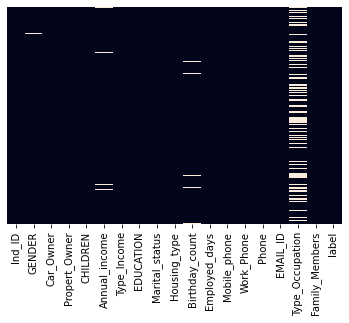

In [287]:
sns.heatmap(creditdata.isnull(),cbar = False,yticklabels = False)

From above heatmap it is to be noticed that number of missing values are more for 'Type_Occupation' feature.

### Converting some Features to more appropiate value

In [288]:
creditdata["Birthday_count"] = round(creditdata["Birthday_count"] * (-1) / 365,1)
creditdata["Employed_days"] = np.where(creditdata["Employed_days"] < 0,round((creditdata["Employed_days"]*-1)/365,1),np.where(creditdata["Employed_days"] > 0,0,"NaN"))
creditdata.rename(columns = {"Employed_days":"Employed(in years)","Birthday_count":"Age",'Propert_Owner':"Property_Owner"},inplace = True)

In [289]:
creditdata1 = creditdata.copy()

In [290]:
creditdata1.head(10)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed(in years),Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.4,0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1.6,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,NaN,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.1,1.6,1,1,1,0,NaN,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,60.6,0,1,0,0,0,NaN,2,1
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.8,1.9,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,49.8,1.9,1,0,1,1,Core staff,3,1


### Outlier Detection

In [291]:
creditdata1.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,43.947706,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,11.587893,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,21.100000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,34.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,42.900000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,53.575000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.300000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


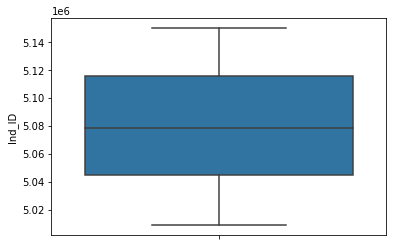

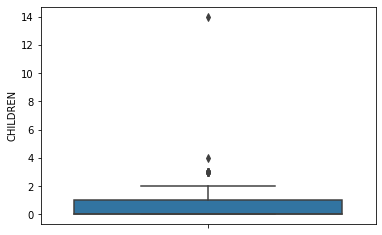

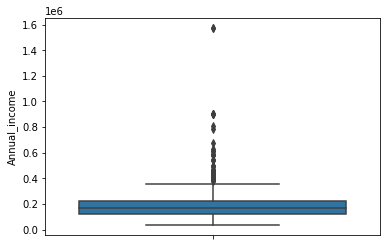

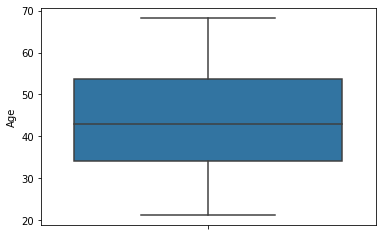

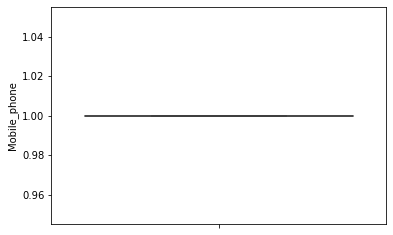

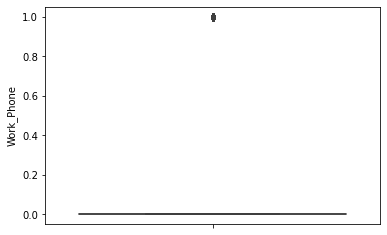

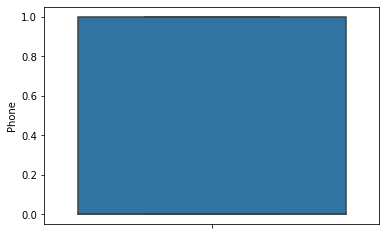

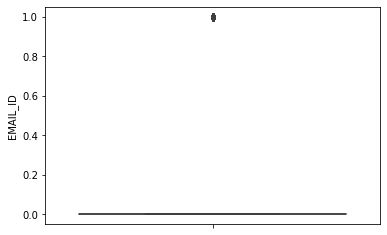

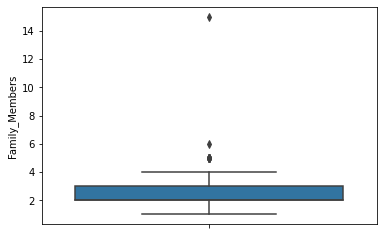

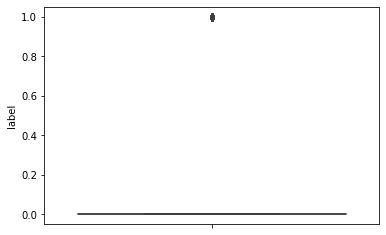

In [292]:
for i in creditdata1.select_dtypes(np.number).columns:
    plt.figure()
    sns.boxplot( y = i,data = creditdata1)

***We determined from the preceding that certain features has missing data and others have outliers, which will be addressed in the following stage.***

## 2.Data Cleaning

Here, a special function is being defined which will clean outliers in required feature.

In [293]:
def outlier_removal(column):
    Q1=creditdata1[column].quantile(0.25)
    Q3=creditdata1[column].quantile(0.75)
    IQR= Q3-Q1
    global UB,LB
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    print(f"For {column} column the IQR value is:{IQR} ")
    print(f"For {column} column the UB  value is:{UB} ")
    print(f"For {column} column the LB  value is:{LB} ")
    creditdata1[column] =np.where(creditdata1[column]>UB,UB,np.where(creditdata1[column]<LB,LB,creditdata1[column]))

In [294]:
outlier_removal('CHILDREN')

For CHILDREN column the IQR value is:1.0 
For CHILDREN column the UB  value is:2.5 
For CHILDREN column the LB  value is:-1.5 


In [428]:
creditdata1.dropna(inplace = True)

In [429]:
creditdata1.isnull().sum()

index                 0
Ind_ID                0
GENDER                0
Car_Owner             0
Property_Owner        0
CHILDREN              0
Annual_income         0
Type_Income           0
EDUCATION             0
Marital_status        0
Housing_type          0
Age                   0
Employed(in years)    0
Mobile_phone          0
Work_Phone            0
Phone                 0
EMAIL_ID              0
Type_Occupation       0
Family_Members        0
label                 0
dtype: int64

In [297]:
creditdata1.head()

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed(in years),Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,M,Y,Y,1.0,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.8,1.9,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1.0,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,49.8,1.9,1,0,1,1,Core staff,3,1
10,5010869,M,Y,Y,1.0,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,49.8,1.9,1,0,1,1,Core staff,1,1
11,5018498,F,Y,Y,0.0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.9,2.7,1,1,1,0,Cooking staff,2,1
13,5018503,F,Y,Y,0.0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.9,2.7,1,1,1,0,Cooking staff,2,1


Changing the datatype of features

In [298]:
creditdata1 = creditdata1.astype({"CHILDREN":"int","Age":"float","Annual_income":"int",'Employed(in years)':"float",'Family_Members':'int'})

In [299]:
creditdata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 8 to 1546
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ind_ID              1025 non-null   int64  
 1   GENDER              1025 non-null   object 
 2   Car_Owner           1025 non-null   object 
 3   Property_Owner      1025 non-null   object 
 4   CHILDREN            1025 non-null   int32  
 5   Annual_income       1025 non-null   int32  
 6   Type_Income         1025 non-null   object 
 7   EDUCATION           1025 non-null   object 
 8   Marital_status      1025 non-null   object 
 9   Housing_type        1025 non-null   object 
 10  Age                 1025 non-null   float64
 11  Employed(in years)  1025 non-null   float64
 12  Mobile_phone        1025 non-null   int64  
 13  Work_Phone          1025 non-null   int64  
 14  Phone               1025 non-null   int64  
 15  EMAIL_ID            1025 non-null   int64  
 16  Type_O

In [300]:
outlier_removal('Employed(in years)')

For Employed(in years) column the IQR value is:7.3 
For Employed(in years) column the UB  value is:20.95 
For Employed(in years) column the LB  value is:-8.25 


In [301]:
outlier_removal('Family_Members')


For Family_Members column the IQR value is:1.0 
For Family_Members column the UB  value is:4.5 
For Family_Members column the LB  value is:0.5 


In [302]:
outlier_removal('Annual_income')

For Annual_income column the IQR value is:99000.0 
For Annual_income column the UB  value is:382500.0 
For Annual_income column the LB  value is:-13500.0 


In [303]:
creditdata1.head(10)

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed(in years),Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,M,Y,Y,1,382500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,49.8,1.9,1,0,1,1,Core staff,3.0,1
9,5010868,M,Y,Y,1,382500.0,Pensioner,Secondary / secondary special,Married,House / apartment,49.8,1.9,1,0,1,1,Core staff,3.0,1
10,5010869,M,Y,Y,1,382500.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,49.8,1.9,1,0,1,1,Core staff,1.0,1
11,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.9,2.7,1,1,1,0,Cooking staff,2.0,1
13,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.9,2.7,1,1,1,0,Cooking staff,2.0,1
15,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,46.3,0.7,1,0,0,0,Laborers,2.0,1
16,5021314,M,N,Y,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,46.3,0.7,1,0,0,0,Laborers,2.0,1
17,5021430,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.8,6.8,1,0,0,0,Sales staff,1.0,1
18,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.8,6.8,1,0,0,0,Sales staff,1.0,1
21,5022617,M,Y,Y,0,202500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,32.9,4.6,1,0,0,1,Laborers,2.0,1


***We now review the boxplots for confirmation that there are no outliers in any of the features after capping the outliers with upper and lower bound values.***

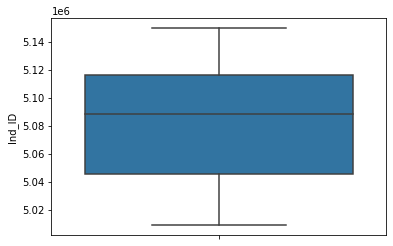

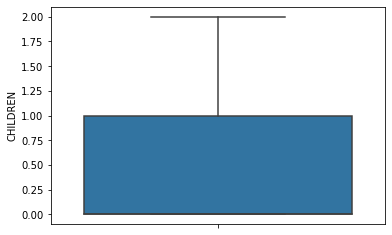

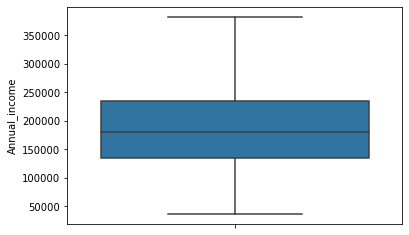

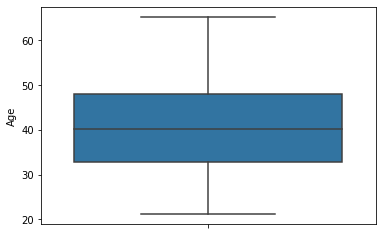

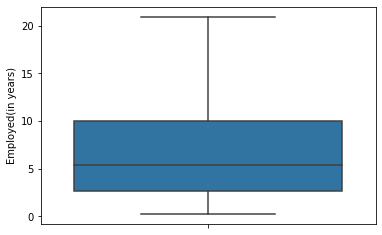

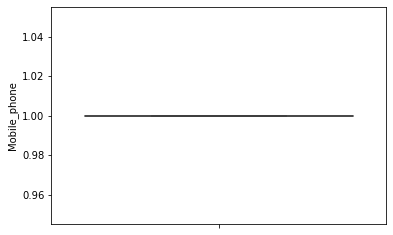

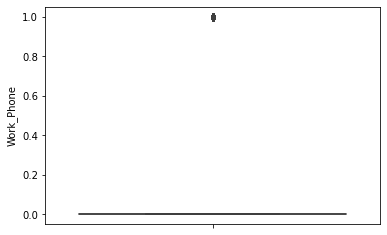

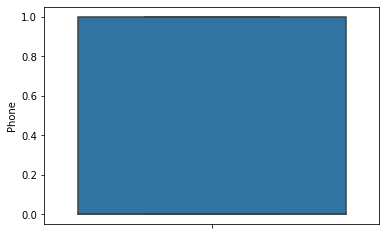

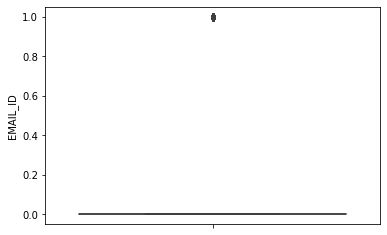

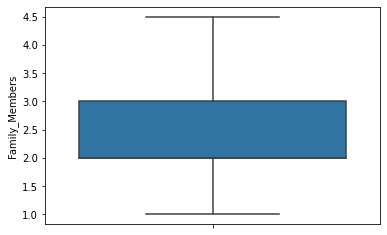

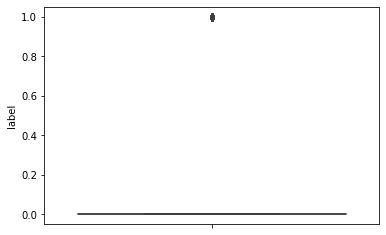

In [304]:
for i in creditdata1.select_dtypes(np.number).columns:
    plt.figure()
    sns.boxplot( y = i,data = creditdata1)

In [305]:
creditdata1.reset_index(inplace = True)

In [306]:
creditdata1.to_excel("creditdata_cleaned.xlsx")

## 3. Exploratory Data Analysis (EDA)

Here we will understand the relations that input columns have with the output columns.

## Univariate Analysis

It is the simplest form of analyzing data, it uses only one variable hence the name, Univariate.

In [307]:
num_columns=list(creditdata1.select_dtypes(include=['int','float']))

In [308]:
num_columns

['index',
 'Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Age',
 'Employed(in years)',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'label']

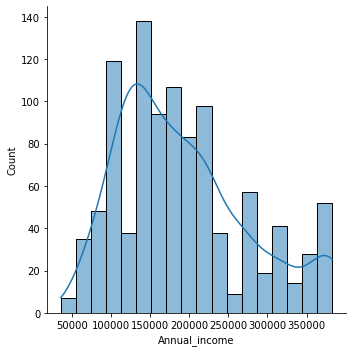

In [309]:
sns.displot(creditdata1['Annual_income'], kde = 'True')

In [310]:
creditdata1['Annual_income'].skew()

0.714226604223688

<AxesSubplot:xlabel='Age', ylabel='Count'>

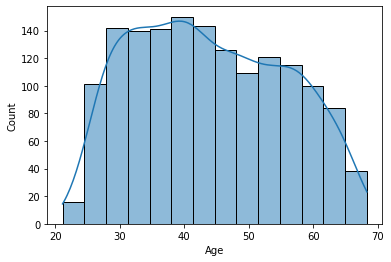

In [311]:
sns.histplot(creditdata['Age'], kde = 'True')

Here the  Age feature looks normally distributed.

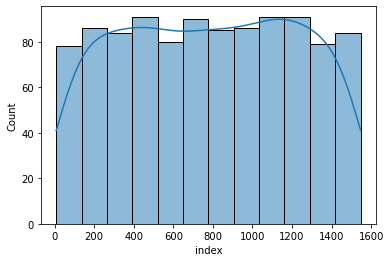

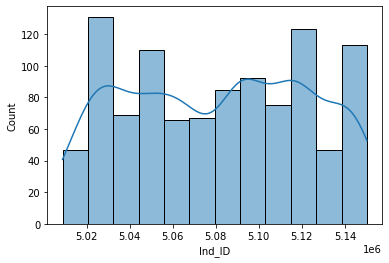

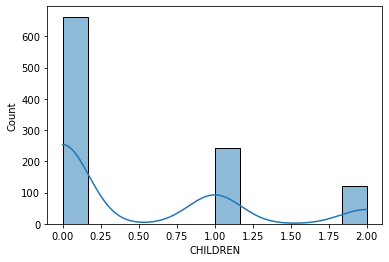

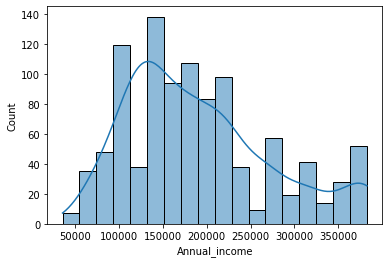

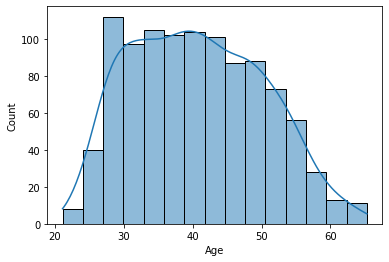

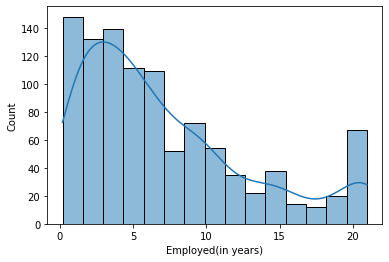

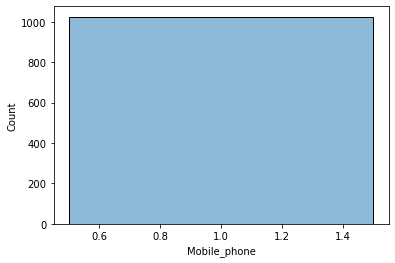

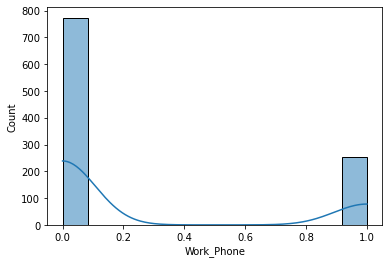

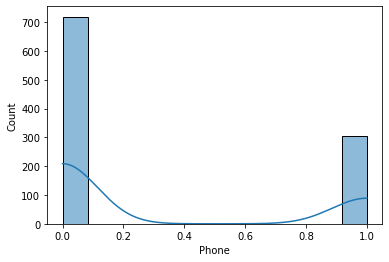

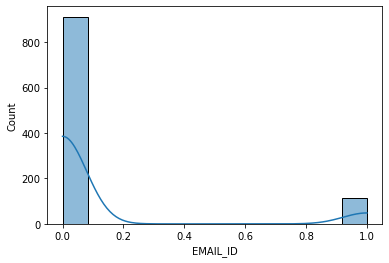

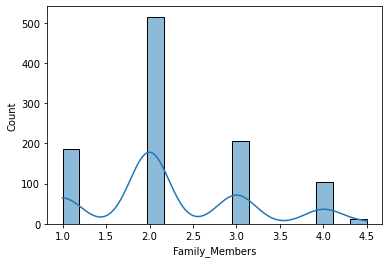

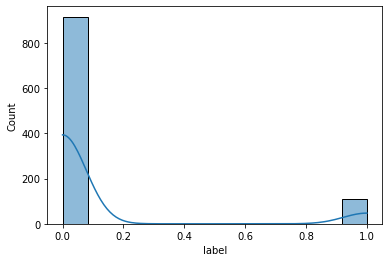

In [312]:

for c in num_columns:
    plt.figure()
    sns.histplot(creditdata1[c],kde=True)

In [313]:

creditdata1.skew().sort_values(ascending = False)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_20220/3853562884.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  creditdata1.skew().sort_values(ascending = False)


label                 2.541121
EMAIL_ID              2.476755
Work_Phone            1.182181
CHILDREN              1.153493
Employed(in years)    1.014527
Phone                 0.881782
Annual_income         0.714227
Family_Members        0.554605
Age                   0.227407
Mobile_phone          0.000000
index                -0.018812
Ind_ID               -0.028286
dtype: float64

***The skewness for label column is highest which indicates that the dataset is imbalanced .***

***Features like Children,Employed(in years), Phone, Annual_Income are having high skewness.***

***Some features like Email_ID,Work_phone,Phone,Mobile_Phone ,Ind_ID will be dropped in the next step as they are irrelevant w.r.t the output column.***

## Bivariate Analysis

Bivariate analysis is a statistical method used to examine the relationship between two different variables or sets of data. It focuses on understanding how changes in one variable are associated with changes in another.

<AxesSubplot:xlabel='Type_Income', ylabel='count'>

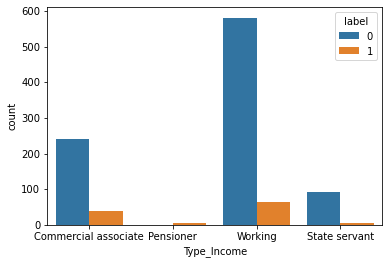

In [314]:
sns.countplot(x='Type_Income', data = creditdata1, hue = 'label')

<AxesSubplot:xlabel='Type_Occupation', ylabel='count'>

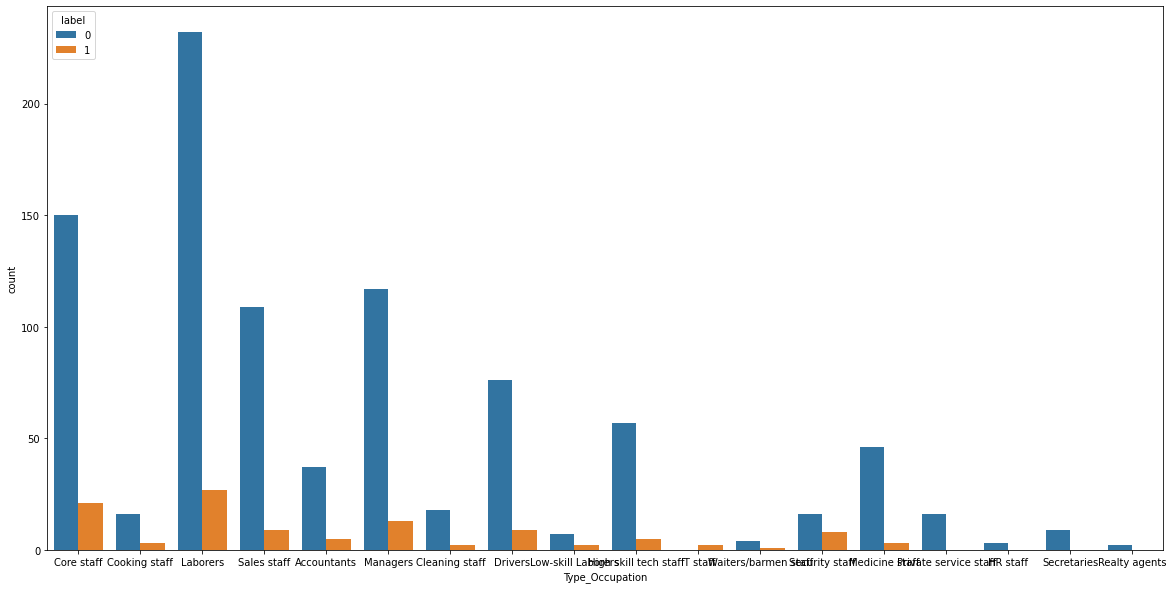

In [315]:
fig, ax = plt.subplots(figsize=(20,10))   
sns.countplot(x='Type_Occupation', data = creditdata1, hue = 'label', ax=ax)

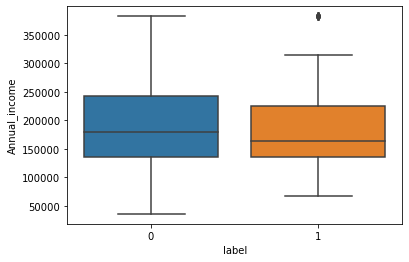

In [317]:
B=sns.boxplot(data = creditdata1,y='Annual_income', x = 'label' )

***From above boxplots it is to be noticed that most people who got credit card approval are  having annual income between 135000 to 234000.***

<AxesSubplot:xlabel='label', ylabel='Age'>

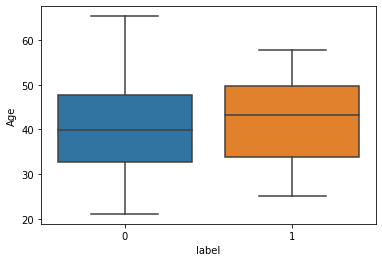

In [318]:
sns.boxplot(data = creditdata1,y='Age', x = 'label' )

***Most people who got thier credit card approved  are of age between 32 to 48.***

In [319]:
creditdata1.describe()


,index,Ind_ID,CHILDREN,Annual_income,Age,Employed(in years),Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1025.000000,1.025000e+03,1025.000000,1025.000000,1025.000000,1025.000000,1025.0,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,781.068293,5.081019e+06,0.470244,191602.167805,40.705854,7.117073,1.0,0.245854,0.298537,0.111220,2.255122,0.107317
std,440.433670,4.193412e+04,0.695509,83469.806402,9.512919,5.748849,0.0,0.430802,0.457839,0.314557,0.896791,0.309667
min,8.000000,5.008865e+06,0.000000,36000.000000,21.100000,0.200000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,403.000000,5.045380e+06,0.000000,135000.000000,32.800000,2.700000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,784.000000,5.088503e+06,0.000000,180000.000000,40.100000,5.400000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1158.000000,5.116478e+06,1.000000,234000.000000,48.000000,10.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,1546.000000,5.150221e+06,2.000000,382500.000000,65.300000,20.950000,1.0,1.000000,1.000000,1.000000,4.500000,1.000000


Checking the correlation between features to get a better understanding of their relations.

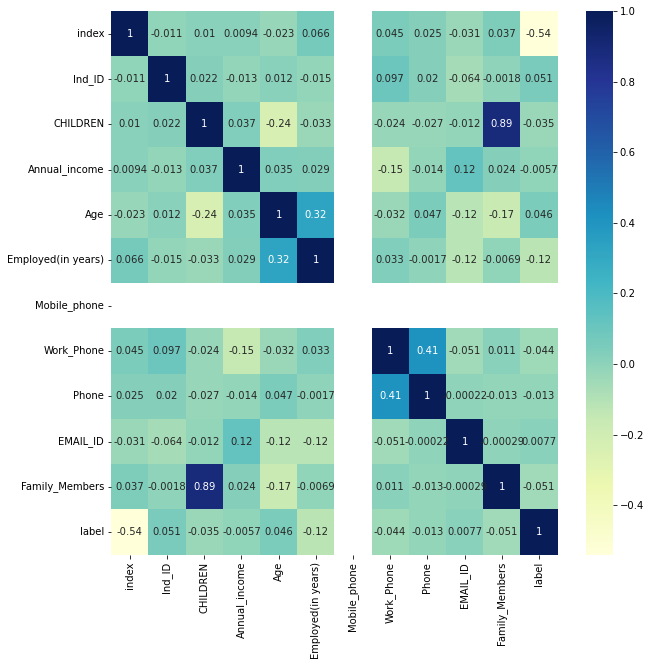

In [320]:
fig, ax = plt.subplots(figsize=(10,10))   
dataplot = sns.heatmap(creditdata1.corr() , cmap="YlGnBu", annot=True,ax=ax)

***Here we can see that the 'Children' and 'family_memebers' columns are highly correlated with each other so we are droppig them for good.***

In [321]:
creditdata2 = creditdata1.copy()

## 4.Feature Selection and Feature Engineering

***Feature engineering is a crucial process in machine learning and data analysis that involves creating new, meaningful features or modifying existing ones from raw data to improve the performance of predictive models.***

In [431]:
creditdata2.nunique()

level_0               1025
index                 1025
GENDER                   2
Car_Owner                2
Property_Owner           2
Annual_income           71
Type_Income              4
Age                    339
Employed(in years)     178
label                    2
dtype: int64

***Checking for unique values in order to decide which encoding techinque to use for feature encoding.***

In [322]:
creditdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1025 non-null   int64  
 1   Ind_ID              1025 non-null   int64  
 2   GENDER              1025 non-null   object 
 3   Car_Owner           1025 non-null   object 
 4   Property_Owner      1025 non-null   object 
 5   CHILDREN            1025 non-null   int32  
 6   Annual_income       1025 non-null   float64
 7   Type_Income         1025 non-null   object 
 8   EDUCATION           1025 non-null   object 
 9   Marital_status      1025 non-null   object 
 10  Housing_type        1025 non-null   object 
 11  Age                 1025 non-null   float64
 12  Employed(in years)  1025 non-null   float64
 13  Mobile_phone        1025 non-null   int64  
 14  Work_Phone          1025 non-null   int64  
 15  Phone               1025 non-null   int64  
 16  EMAIL_

***Lets drop some features which are not really relevant to the output feature.***

Ind_ID, Children, education, Martial_status, Housing type, Mobile Phone, work phone, phone, email id, family members

In [323]:
creditdata2.drop(['Ind_ID','CHILDREN','EDUCATION','Marital_status','Housing_type','Mobile_phone','Work_Phone','Phone','EMAIL_ID','Family_Members','Type_Occupation'],axis =1,inplace =  True)

In [324]:
creditdata2.head(10)

,index,GENDER,Car_Owner,Property_Owner,Annual_income,Type_Income,Age,Employed(in years),label
0,8,M,Y,Y,382500.0,Commercial associate,49.8,1.9,1
1,9,M,Y,Y,382500.0,Pensioner,49.8,1.9,1
2,10,M,Y,Y,382500.0,Commercial associate,49.8,1.9,1
3,11,F,Y,Y,90000.0,Working,51.9,2.7,1
4,13,F,Y,Y,90000.0,Working,51.9,2.7,1
5,15,M,N,Y,270000.0,Working,46.3,0.7,1
6,16,M,N,Y,270000.0,Working,46.3,0.7,1
7,17,F,N,Y,126000.0,Commercial associate,51.8,6.8,1
8,18,F,N,Y,126000.0,Commercial associate,51.8,6.8,1
9,21,M,Y,Y,202500.0,Commercial associate,32.9,4.6,1


In [325]:
creditdata2.reset_index(inplace = True )

In [326]:
creditdata2

,level_0,index,GENDER,Car_Owner,Property_Owner,Annual_income,Type_Income,Age,Employed(in years),label
0,0,8,M,Y,Y,382500.0,Commercial associate,49.8,1.9,1
1,1,9,M,Y,Y,382500.0,Pensioner,49.8,1.9,1
2,2,10,M,Y,Y,382500.0,Commercial associate,49.8,1.9,1
3,3,11,F,Y,Y,90000.0,Working,51.9,2.7,1
4,4,13,F,Y,Y,90000.0,Working,51.9,2.7,1
...,...,...,...,...,...,...,...,...,...,...
1020,1020,1540,F,Y,Y,144000.0,Working,35.4,8.0,0
1021,1021,1542,M,Y,N,360000.0,State servant,30.9,9.7,0
1022,1022,1544,F,N,N,225000.0,Commercial associate,28.0,3.3,0
1023,1023,1545,M,Y,Y,180000.0,Working,36.1,6.8,0


In [327]:
creditdata2.nunique()

level_0               1025
index                 1025
GENDER                   2
Car_Owner                2
Property_Owner           2
Annual_income           71
Type_Income              4
Age                    339
Employed(in years)     178
label                    2
dtype: int64

## Feature Encoding

In [432]:
label_encoder = LabelEncoder()
creditdata2["GENDER"] = label_encoder.fit_transform(creditdata2["GENDER"])
creditdata2["Car_Owner"] = label_encoder.fit_transform(creditdata2["Car_Owner"])
creditdata2["Property_Owner"] = label_encoder.fit_transform(creditdata2["Property_Owner"])
creditdata_dummies=pd.get_dummies(data = creditdata2,columns=["Type_Income"],drop_first=1)

<IPython.core.display.Javascript object>

In the above we can see we have used Labelencoder for feature encoding as the used features are having only two unique values.

In [329]:
creditdata_dummies

,level_0,index,GENDER,Car_Owner,Property_Owner,Annual_income,Age,Employed(in years),label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working
0,0,8,1,1,1,382500.0,49.8,1.9,1,0,0,0
1,1,9,1,1,1,382500.0,49.8,1.9,1,1,0,0
2,2,10,1,1,1,382500.0,49.8,1.9,1,0,0,0
3,3,11,0,1,1,90000.0,51.9,2.7,1,0,0,1
4,4,13,0,1,1,90000.0,51.9,2.7,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,1540,0,1,1,144000.0,35.4,8.0,0,0,0,1
1021,1021,1542,1,1,0,360000.0,30.9,9.7,0,0,1,0
1022,1022,1544,0,0,0,225000.0,28.0,3.3,0,0,0,0
1023,1023,1545,1,1,1,180000.0,36.1,6.8,0,0,0,1


In [330]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest 


## For better analysis, we will treat X as a dataframe with all input features and Y as a dataframe with just output features from now on.

In [427]:
X=creditdata_dummies.drop(columns = ['index','label'])
Y=creditdata_dummies['label']

In [332]:
chi_scores = chi2(X,Y)

In [333]:
chi_scores

(array([5.03741455e+04, 3.39311125e+00, 7.52071761e-02, 3.53134018e-01,
        1.19411473e+03, 4.85156283e+00, 6.99674946e+01, 2.50422255e+01,
        4.42125156e+00, 4.40893880e-01]),
 array([0.00000000e+000, 6.54693037e-002, 7.83900753e-001, 5.52344377e-001,
        1.15967379e-261, 2.76210952e-002, 6.02898176e-017, 5.60884475e-007,
        3.54939933e-002, 5.06691333e-001]))

***Here first array represents chi square values and second array represnts p-values***

***Null hypothesis (H0): This is the statement that there is no significant difference or relationship between the variables being studied.***

***Alternative hypothesis (Ha): This is the statement that there is a significant difference or relationship between the variables being studied.***

In [334]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

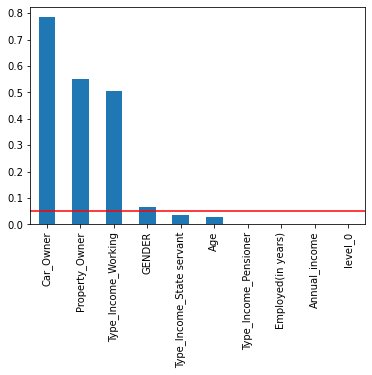

In [335]:
p_values.plot.bar()
plt.axhline(y=0.05, color='r', linestyle='-')

***P-value helps us determine how likely it is to get a particular result when the null hypothesis is assumed to be true***

***Here we may observe additional significant features with p-values less than 0.05.***

>Gender

>Type_Income_State servant

>Age

>Type_Income_Pensioner

>Employed(in years)

>Annual_income



***We used SelectKBest to choose the features with the best chi-square. We supplied two parameters: one is the scoring metric, chi2, and the other is the value of K, which represents the number of features we want in the final dataset. Fit_transform was used to fit and transform the existing dataset into the desired dataset.*** 

In [336]:
chi2_features = SelectKBest(chi2, k = 4)
X_kbest_features = chi2_features.fit_transform(X, Y)

In [337]:
print('Original feature number:', creditdata_dummies.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 12
Reduced feature number: 4


In [338]:
chi2_features.get_support()

array([ True, False, False, False,  True, False,  True,  True, False,
       False])

In [339]:
creditdata_dummies

,level_0,index,GENDER,Car_Owner,Property_Owner,Annual_income,Age,Employed(in years),label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working
0,0,8,1,1,1,382500.0,49.8,1.9,1,0,0,0
1,1,9,1,1,1,382500.0,49.8,1.9,1,1,0,0
2,2,10,1,1,1,382500.0,49.8,1.9,1,0,0,0
3,3,11,0,1,1,90000.0,51.9,2.7,1,0,0,1
4,4,13,0,1,1,90000.0,51.9,2.7,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1020,1540,0,1,1,144000.0,35.4,8.0,0,0,0,1
1021,1021,1542,1,1,0,360000.0,30.9,9.7,0,0,1,0
1022,1022,1544,0,0,0,225000.0,28.0,3.3,0,0,0,0
1023,1023,1545,1,1,1,180000.0,36.1,6.8,0,0,0,1


## ***From above also we can observe that the following features are affecting the output mostly***
***Annual_income***

***Age***

***Employed(in years)***

***Type_Income_Pensioner***






In [340]:
New_X=X.drop(['GENDER','Car_Owner','Property_Owner'],axis =1)


## 5.Modeling

***Now we have our dataset ready for building a machine learning-based classifier. There are several classification models that can be used for this task. In this analysis, we will build five different types of classification models namely Logistic Regression, Decision Tree, Gradient Boost, XGBoost and, K-Nearest Neighbors (KNN). These are the most popular models used for solving classification problems.***

## 6.Train-Test Split

In [341]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)

#### Perform Feature Scaling
After we’ve split the dataset into training and testing sets, we’ll perform feature scaling. Feature scaling is the process of standardizing the range of features. It’s an important step because it ensures that all features are given equal importance during training.

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [343]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k='all')
X_train = selector.fit_transform(X_train, Y_train)
X_test = selector.transform(X_test)

In [344]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## 7.Model Training

#### X value has all the features.
#### New_X value which has all features except Gender,car_owner and Property owner .


#### Model: Logistic Regression

***Logistic Regression is a statistical and machine learning technique used for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., yes/no, true/false, 1/0).***

In [345]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [346]:
from sklearn.metrics import accuracy_score

y_pred = model1.predict(X_test)
accuracyl1 = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracyl1)

Accuracy: 0.9853658536585366


#### Logisticregression with New_X

In [347]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(New_X,Y,test_size = 0.3, random_state = 42)
model1.fit(X_train2,Y_train2)
y_pred2 = model1.predict(X_test2)

from sklearn.metrics import accuracy_score

y_pred = model1.predict(X_test2)
accuracyl2 = accuracy_score(Y_test2, y_pred2)
print("Accuracy:", accuracyl2)

Accuracy: 0.9837662337662337


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Model: Decision Tree

***A Decision Tree is a popular supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of input features.***

In [348]:
from sklearn import tree

In [349]:
model2 = tree.DecisionTreeClassifier()

In [350]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size = 0.3, random_state = 42)

In [351]:
model2.fit(X_train1,Y_train1)

DecisionTreeClassifier()

In [352]:
y_pred1 = model2.predict(X_test1)


***Accuracy Score For Decision tree***

In [353]:
from sklearn.metrics import accuracy_score
accuracyd1=accuracy_score(Y_test1, y_pred1)
print(f'Accuracy: {accuracyd1}')

Accuracy: 1.0


#### Decisiontree  with New_X

In [354]:
model2 = tree.DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(New_X,Y,test_size = 0.3, random_state = 42)
model2.fit(X_train3,Y_train3)
y_pred3=model2.predict(X_test3)
from sklearn.metrics import accuracy_score
accuracyd2=accuracy_score(Y_test3,y_pred3)
print(f'Accuracy: {accuracyd2}')

Accuracy: 1.0


#### Model:XGBoost 

We built this model using the XGBClassifier algorithm provided by the XGBoost package. Using the XGBoost model with default values for hyperparameters, we obtained an accuracy of ***90%*** on the test dataset.

#### XGBoost with Original X

In [355]:
# fit model to training data
import xgboost as xgb
model3 = xgb.XGBClassifier()
model3.fit(X_train, Y_train)

train_predict = model3.predict(X_train)
test_predict = model3.predict(X_test)

test_acc = accuracy_score(Y_test, test_predict)
train_acc = accuracy_score(Y_train, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 1.0 Test score: 1.0


***Here we are using only the relevant features for model training and the accuracy score is 90.***

#### XGBoost with New_X

In [356]:
# fit model to training data
import xgboost as xgb
model3 = xgb.XGBClassifier()
model3.fit(X_train3, Y_train3)

train_predict = model3.predict(X_train3)
test_predict = model3.predict(X_test3)

test_acc2 = accuracy_score(Y_test3, test_predict)
train_acc = accuracy_score(Y_train3, train_predict)
print('Train score:',train_acc,'Test score:',test_acc2)

Train score: 1.0 Test score: 1.0


#### Model:KNN

***K-Nearest Neighbors (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks***

***Original X Value***

In [357]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(X_train,Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
test_acck1 = accuracy_score(Y_test, test_predict)
train_acc = accuracy_score(Y_train, train_predict)

print(i,'Train score:',train_acc,'Test score:',test_acck1)

label Train score: 0.9426829268292682 Test score: 0.9317073170731708


***With New X value***

In [358]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(X_train3,Y_train3)
train_predict = knn.predict(X_train3)
test_predict = knn.predict(X_test3)
test_acck2 = accuracy_score(Y_test3, test_predict)
train_acc = accuracy_score(Y_train3, train_predict)

print(i,'Train score:',train_acc,'Test score:',test_acck2)

label Train score: 0.9707112970711297 Test score: 0.9675324675324676


#### Model: Random Forest 

***A Random Forest model is an ensemble machine learning technique that combines multiple decision trees to make more accurate and robust predictions.***

***Original X Value***

In [359]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred = rf.predict(X_test)
accuracyR1 = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracyR1)

Accuracy: 1.0


***With New X value***

In [360]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train3, Y_train3)
y_pred = rf.predict(X_test3)
accuracyR2 = accuracy_score(Y_test3, y_pred)
print("Accuracy:", accuracyR2)

Accuracy: 1.0


#### Now for comparison we will put the results in a Dataframe 

In [361]:
results = {'Logistic Regression':round(accuracyl1*100,2),
          'Decision tree':round(accuracyd1*100,2),
          'XG Boost':round(test_acc*100,2),
          'KNN':round(test_acck1*100,2),
          'Random Forest':round(accuracyR1*100,2)}

In [362]:
result=pd.DataFrame(results,index = [0])

In [363]:
result=result.transpose()
result

,0
Logistic Regression,98.54
Decision tree,100.00
XG Boost,100.00
KNN,93.17
Random Forest,100.00


In [364]:
result.rename(columns = {0:'Accuracy(in Percentage)'},inplace = True)

In [365]:
result

,Accuracy(in Percentage)
Logistic Regression,98.54
Decision tree,100.00
XG Boost,100.00
KNN,93.17
Random Forest,100.00


## Conclusion

Following analysis and model construction, it is discovered that the dataset is unbalanced, resulting in less accurate model results.Oversampling will be performed on the dataset to address this imbalancing.

*************************************
***To rectify imbalanced data we will be using Over-sampling to check if it has any sigificant effects on the model results.***
*************************************

## Over-sampling using SMOTE

Applying reset_index to  have a index column 

In [366]:
##creditdata_dummies.drop(columns=['level_0','index'],inplace = True)

In [367]:
##creditdata_dummies.reset_index(inplace =True)

In [368]:
creditdata_dummies.head()

,level_0,index,GENDER,Car_Owner,Property_Owner,Annual_income,Age,Employed(in years),label,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working
0,0,8,1,1,1,382500.0,49.8,1.9,1,0,0,0
1,1,9,1,1,1,382500.0,49.8,1.9,1,1,0,0
2,2,10,1,1,1,382500.0,49.8,1.9,1,0,0,0
3,3,11,0,1,1,90000.0,51.9,2.7,1,0,0,1
4,4,13,0,1,1,90000.0,51.9,2.7,1,0,0,1


In [369]:
X.head()

,level_0,GENDER,Car_Owner,Property_Owner,Annual_income,Age,Employed(in years),Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working
0,0,1,1,1,382500.0,49.8,1.9,0,0,0
1,1,1,1,1,382500.0,49.8,1.9,1,0,0
2,2,1,1,1,382500.0,49.8,1.9,0,0,0
3,3,0,1,1,90000.0,51.9,2.7,0,0,1
4,4,0,1,1,90000.0,51.9,2.7,0,0,1


In [370]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Name: label, Length: 1025, dtype: int64

We already have X and Y split data,
we can use them for Over-sampling.

In [371]:
from imblearn.over_sampling import SMOTE

In [372]:
os = SMOTE(random_state = 42)
columns = X.columns

In [373]:
os_data_X,os_data_Y = os.fit_sample(X,Y)
os_data_X = pd.DataFrame(data = os_data_X,columns = columns)
os_data_Y = pd.DataFrame(data = os_data_Y,columns = ['label'])

In [374]:
#We can Check the numbers of our data
print('length of oversampled data is ',len(os_data_X))
print('Number of no card in oversampled data',len(os_data_Y[os_data_Y['label']==0]))
print('Number of card',len(os_data_Y[os_data_Y['label']==1]))
print('Proportion of no card data in oversampled data is ',len(os_data_Y[os_data_Y['label']==0])/len(os_data_X))
print('Proportion of card data in oversampled data is ',len(os_data_Y[os_data_Y['label']==1])/len(os_data_X))

length of oversampled data is  1830
Number of no card in oversampled data 915
Number of card 915
Proportion of no card data in oversampled data is  0.5
Proportion of card data in oversampled data is  0.5


## Train-Test Split (after over-sampling)


In [375]:
from sklearn.model_selection import train_test_split
X_train_O,X_test_O,Y_train_O,Y_test_O = train_test_split(os_data_X,os_data_Y,test_size = 0.2, random_state = 42)

## Standardiztion of Data

In [376]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_O = scaler.fit_transform(X_train_O)
X_test_O = scaler.transform(X_test_O)

#### Model: Logistic Regression

In [377]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train_O, Y_train_O.values.ravel())

LogisticRegression()

In [378]:
from sklearn.metrics import accuracy_score

y_pred = model1.predict(X_test_O)
accuracyl1_O = accuracy_score(Y_test_O, y_pred)
print("Accuracy:", accuracyl1_O)

Accuracy: 0.9863387978142076


In [ ]:
plt.plot(neighbors_settings, accuracyl1_O, label=”training accuracy”)
plt.plot(neighbors_settings, test_accuracy, label=”test accuracy”)
plt.ylabel(“Logistic Regression”)
plt.xlabel(“n_neighbors”)
plt.legend()
plt.savefig(‘Logistic Regression’)

#### Model: Decision Tree

In [379]:
from sklearn import tree
model2

DecisionTreeClassifier()

In [380]:
model2.fit(X_train_O,Y_train_O)
y_pred_O = model2.predict(X_test_O)

In [381]:
accuracy_O = accuracy_score(Y_test_O,y_pred_O)
print(f'Accuracy: {accuracy_O}')

Accuracy: 1.0


#### Model: XG Boost

In [382]:
# fit model to training data
import xgboost as xgb
model3 = xgb.XGBClassifier()
model3.fit(X_train_O, Y_train_O)

train_predict = model3.predict(X_train_O)
test_predict = model3.predict(X_test_O)

test_acc_O = accuracy_score(Y_test_O, test_predict)
train_acc_O = accuracy_score(Y_train_O, train_predict)
print('Train score:',train_acc_O,'Test score:',test_acc_O)

Train score: 1.0 Test score: 0.9972677595628415


#### Model:KNN

In [383]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(X_train_O,Y_train_O.values.ravel())
train_predict = knn.predict(X_train_O)
test_predict = knn.predict(X_test_O)
test_acck1_O = accuracy_score(Y_test_O, test_predict)
train_acc_O = accuracy_score(Y_train_O, train_predict)

print(i,'Train score:',train_acc_O,'Test score:',test_acck1_O)

label Train score: 0.9474043715846995 Test score: 0.9207650273224044


#### Model:Random Forest

In [384]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_O, Y_train_O.values.ravel())
y_pred_OR = rf.predict(X_test_O)
accuracyR1_O = accuracy_score(Y_test_O, y_pred_OR)
print("Accuracy:", accuracyR1_O)

Accuracy: 1.0


## Conclusion

In [418]:
results_Oversampling= {'Logistic Regression':round(accuracyl1_O*100,2),
          'Decision tree':round(accuracy_O*100,2),
          'XG Boost':round(test_acc_O*100,2),
          'KNN':round(test_acck1_O*100,2),
          'Random Forest':round(accuracyR1_O*100,2)}

In [419]:
results_Oversampling=pd.DataFrame(results_Oversampling,index = [0])
results_Oversampling=results_Oversampling.transpose()


In [420]:
results_Oversampling.rename(columns = {0:'Oversampling_data_Accuracy(in Percentage)'},inplace = True)

In [421]:
results_Oversampling.rename(columns = {'Accuracy(in Percentage)':'Oversampling_data_Accuracy(in Percentage)'},inplace = True)

In [422]:
results_Oversampling

,Oversampling_data_Accuracy(in Percentage)
Logistic Regression,98.63
Decision tree,100.00
XG Boost,99.73
KNN,92.08
Random Forest,100.00


After oversampling the data we got to know that Random Forest will be the best for analysis.

In [423]:
frames = [result,results_Oversampling]

results = pd.concat(frames,axis = 1)

In [424]:
results

,Accuracy(in Percentage),Oversampling_data_Accuracy(in Percentage)
Logistic Regression,98.54,98.63
Decision tree,100.00,100.00
XG Boost,100.00,99.73
KNN,93.17,92.08
Random Forest,100.00,100.00


In [425]:
results.mean(axis = 0)

Accuracy(in Percentage)                      98.342
Oversampling_data_Accuracy(in Percentage)    98.088
dtype: float64

Almost Same mean value for both scenarios.(Balanced and Imbalnced datasets)

## Summary:

After conducting a comprehensive analysis and employing machine learning modeling techniques, the following key steps were taken:

1. **Data Preprocessing:** Initially, the dataset exhibited issues such as data imbalance and missing values. To address these concerns, a rigorous data cleaning process was executed to rectify the data quality.

2. **Data Analysis:** Subsequent to data cleaning, an in-depth data analysis was conducted. This analysis included the identification and treatment of outliers within the dataset.

3. **Exploratory Data Analysis (EDA):** EDA encompassed univariate and bivariate analyses, which served to uncover valuable insights. Furthermore, this stage facilitated feature engineering and feature encoding to enhance the dataset for modeling.

4. **Machine Learning Modeling:** Several machine learning models were considered for predictive modeling, including:
   - Logistic Regression
   - Decision Tree
   - XG Boost
   - K-Nearest Neighbors (KNN)
   - Random Forest

5. **Model Evaluation:** During the evaluation of these models, it was observed that the Decision Tree and Random Forest models consistently achieved 100% accuracy across both imbalanced and balanced data cases.

This systematic approach ensured a thorough examination of the data and resulted in the identification of highly accurate models for further consideration or deployment.

In [426]:
results

,Accuracy(in Percentage),Oversampling_data_Accuracy(in Percentage)
Logistic Regression,98.54,98.63
Decision tree,100.00,100.00
XG Boost,100.00,99.73
KNN,93.17,92.08
Random Forest,100.00,100.00


***************************
## SQL Questions and Answers
***************************

***1. Group the customers based on their income type and find the average of their annual income.***

select Type_Income,
round(AVG(Annual_income),2) as Average_Income from Creditdata group by Type_Income

***2. Find the female owners of cars and property.***

select * from Creditdata where GENDER = 'F' and Car_Owner = 'Y' and Property_Owner = 'Y'

***3. Find the male customers who are staying with their families.***

select * from Creditdata where GENDER = 'M' and Family_Members <> 1

***4. Please list the top five people having the highest income.***

select * from creditdata where annual_income in (select top 5 annual_income from Creditdata order by Annual_income desc)

***5. How many married people are having bad credit?***

select COUNT() Married_Bad_credit from Creditdata where Marital_status = 'Married' and label = 0

***6. What is the highest education level and what is the total count?***

select top 1 education, COUNT() no_of_people from creditdata group by EDUCATION order by EDUCATION

***7. Between married males and females, who is having more bad credit?***

select gender,COUNT(*) no_of_people from Creditdata where label like 0 and Marital_status like 'Married' group by GENDER order by no_of_people desc


### *********************************END OF THE PROJECT****************************************